In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df1 = pd.DataFrame(np.random.randint(-7,31,size=(365, 1)))

In [4]:
df1.head()

,0
0,29
1,23
2,4
3,1
4,22


In [5]:
df2 = pd.DataFrame(np.random.randint(1433,3189,size=(365, 1)))

In [6]:
df2.head()

,0
0,2456
1,2222
2,1777
3,1524
4,2757


In [7]:
df = pd.DataFrame()

In [8]:
df['Temperature'] = df1[0] 
df['Sales'] = (abs(df['Temperature']//0.7))*(df2[0])
df.shape

(365, 2)

In [9]:
df.head()

,Temperature,Sales
0,29,100696.0
1,23,71104.0
2,4,8885.0
3,1,1524.0
4,22,85467.0


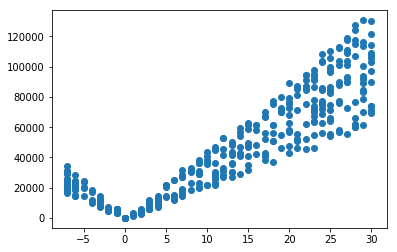

In [10]:
plt.scatter(x=df['Temperature'], y=df['Sales'])

In [11]:
import seaborn as sns

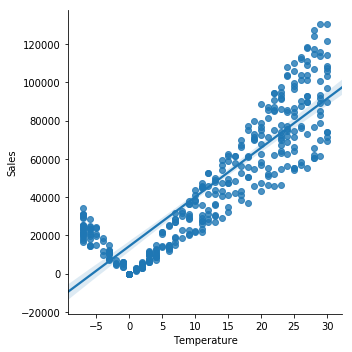

In [12]:
sns.lmplot(data=df, x='Temperature', y='Sales')

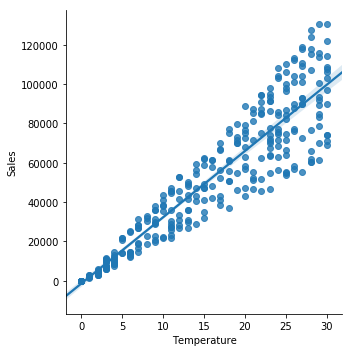

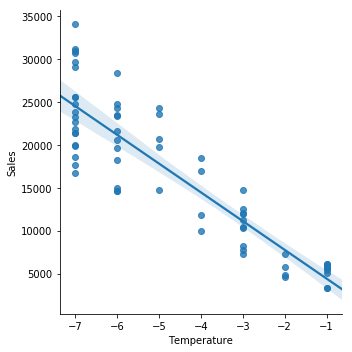

In [13]:
sns.lmplot(data=df[df.Temperature >= 0], x='Temperature', y='Sales')
sns.lmplot(data=df[df.Temperature < 0], x='Temperature', y='Sales')

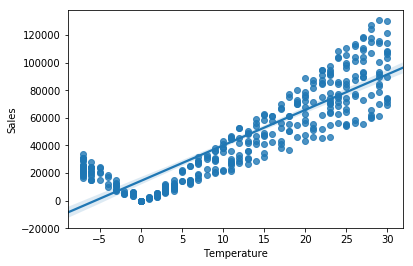

In [14]:
sns.regplot(data=df, x='Temperature', y='Sales')

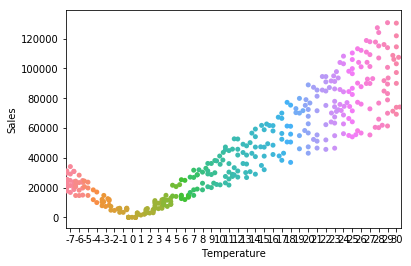

In [15]:
sns.swarmplot(data=df, x='Temperature', y='Sales')

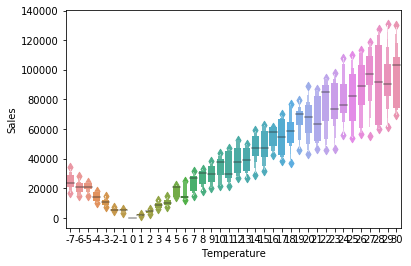

In [16]:
sns.lvplot(data=df, x='Temperature', y='Sales')

In [17]:
from scipy import stats as st

In [18]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = st.linregress(df['Temperature'],df['Sales'])

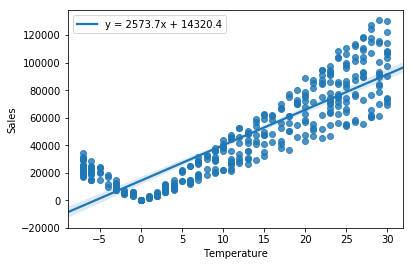

In [19]:
ax = sns.regplot(data=df, x='Temperature', y='Sales', line_kws={'label':"y = {0:.1f}x + {1:.1f}".format(slope,intercept)})
ax.legend()

#### fit second order polynomial

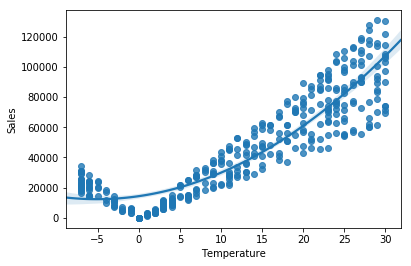

In [20]:
ax = sns.regplot(data=df, x='Temperature', y='Sales', order=2)

In [21]:
from scipy.optimize import curve_fit

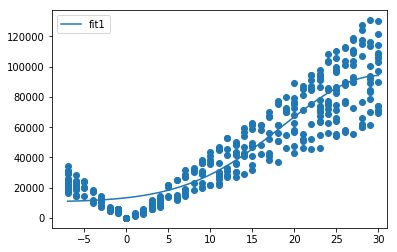

In [22]:
# plot data
plt.scatter(df["Temperature"].values, df["Sales"].values)

# Fitting
model = lambda x, A, x0, sigma, offset:  offset+A*np.exp(-((x-x0)/sigma)**2)
popt, pcov = curve_fit(model, df["Temperature"].values, 
                              df["Sales"].values, p0=[1,0,2,0])

# plot fit
x = np.linspace(df["Temperature"].values.min(), df["Temperature"].values.max(), 100)
plt.plot(x, model(x, *popt), label="fit1")

plt.xlim(None,31)
plt.legend()

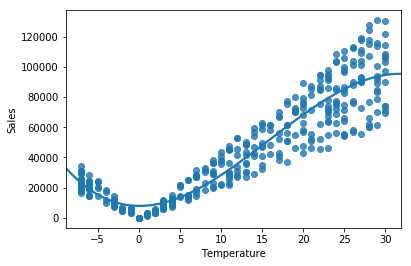

In [23]:
sns.regplot(data=df, x='Temperature', y='Sales', order=3, fit_reg=True, ci=None)